In [1]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

titanic_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls"
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count plot - Survived')

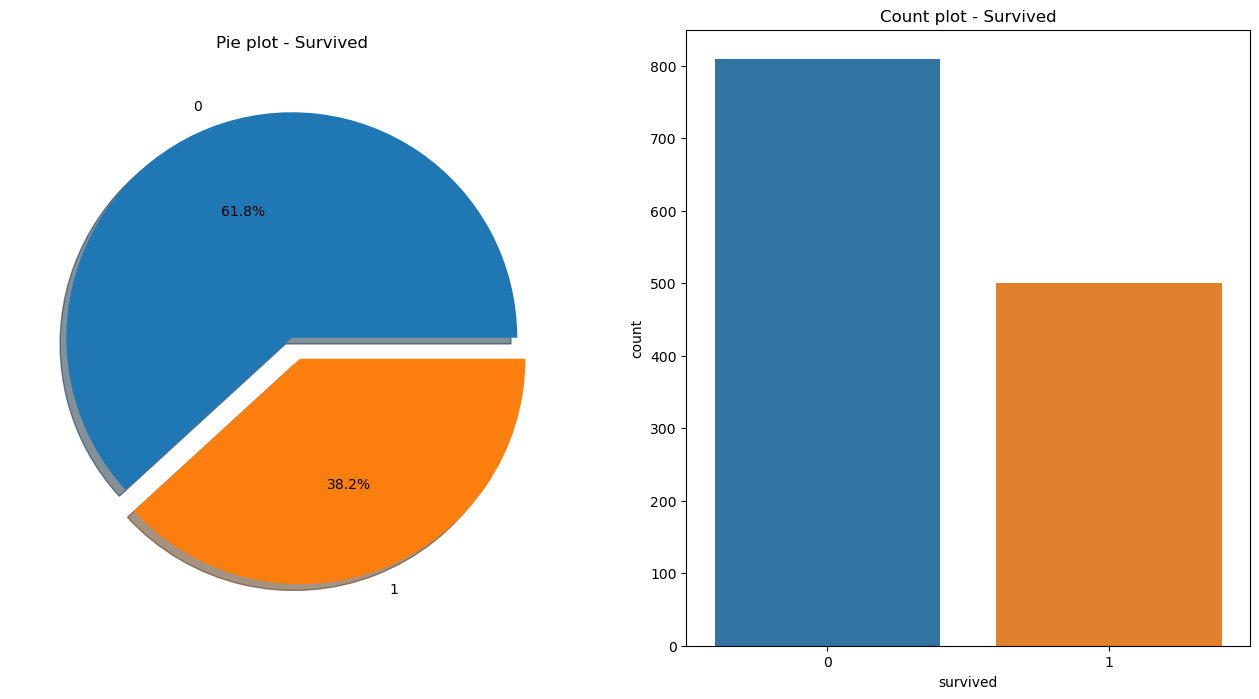

In [4]:
f,ax=plt.subplots(1,2, figsize=(16,8))

titanic['survived'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%' ,shadow=True,explode=[0,0.1])
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

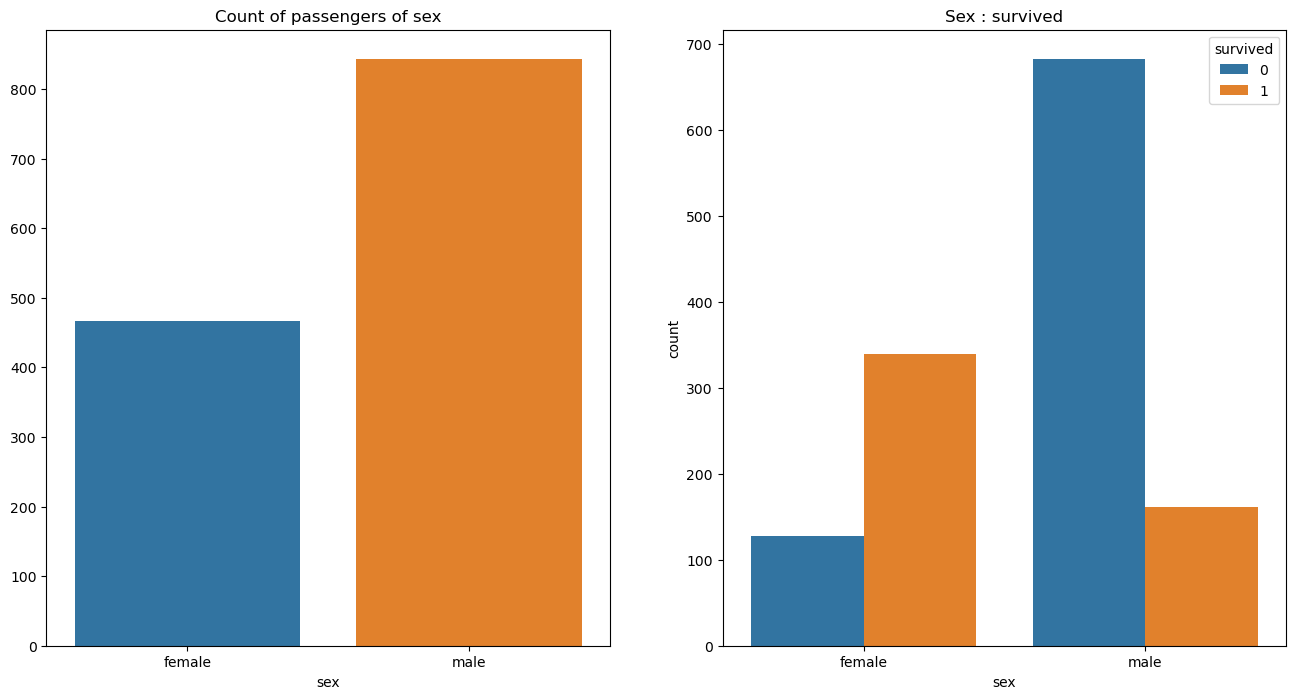

In [5]:
# 성별에 따른 생존률
f,ax=plt.subplots(1,2, figsize=(16,8))

sns.countplot(x='sex',data=titanic,ax=ax[0])
ax[0].set_title("Count of passengers of sex")
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex : survived')

plt.show()

In [6]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


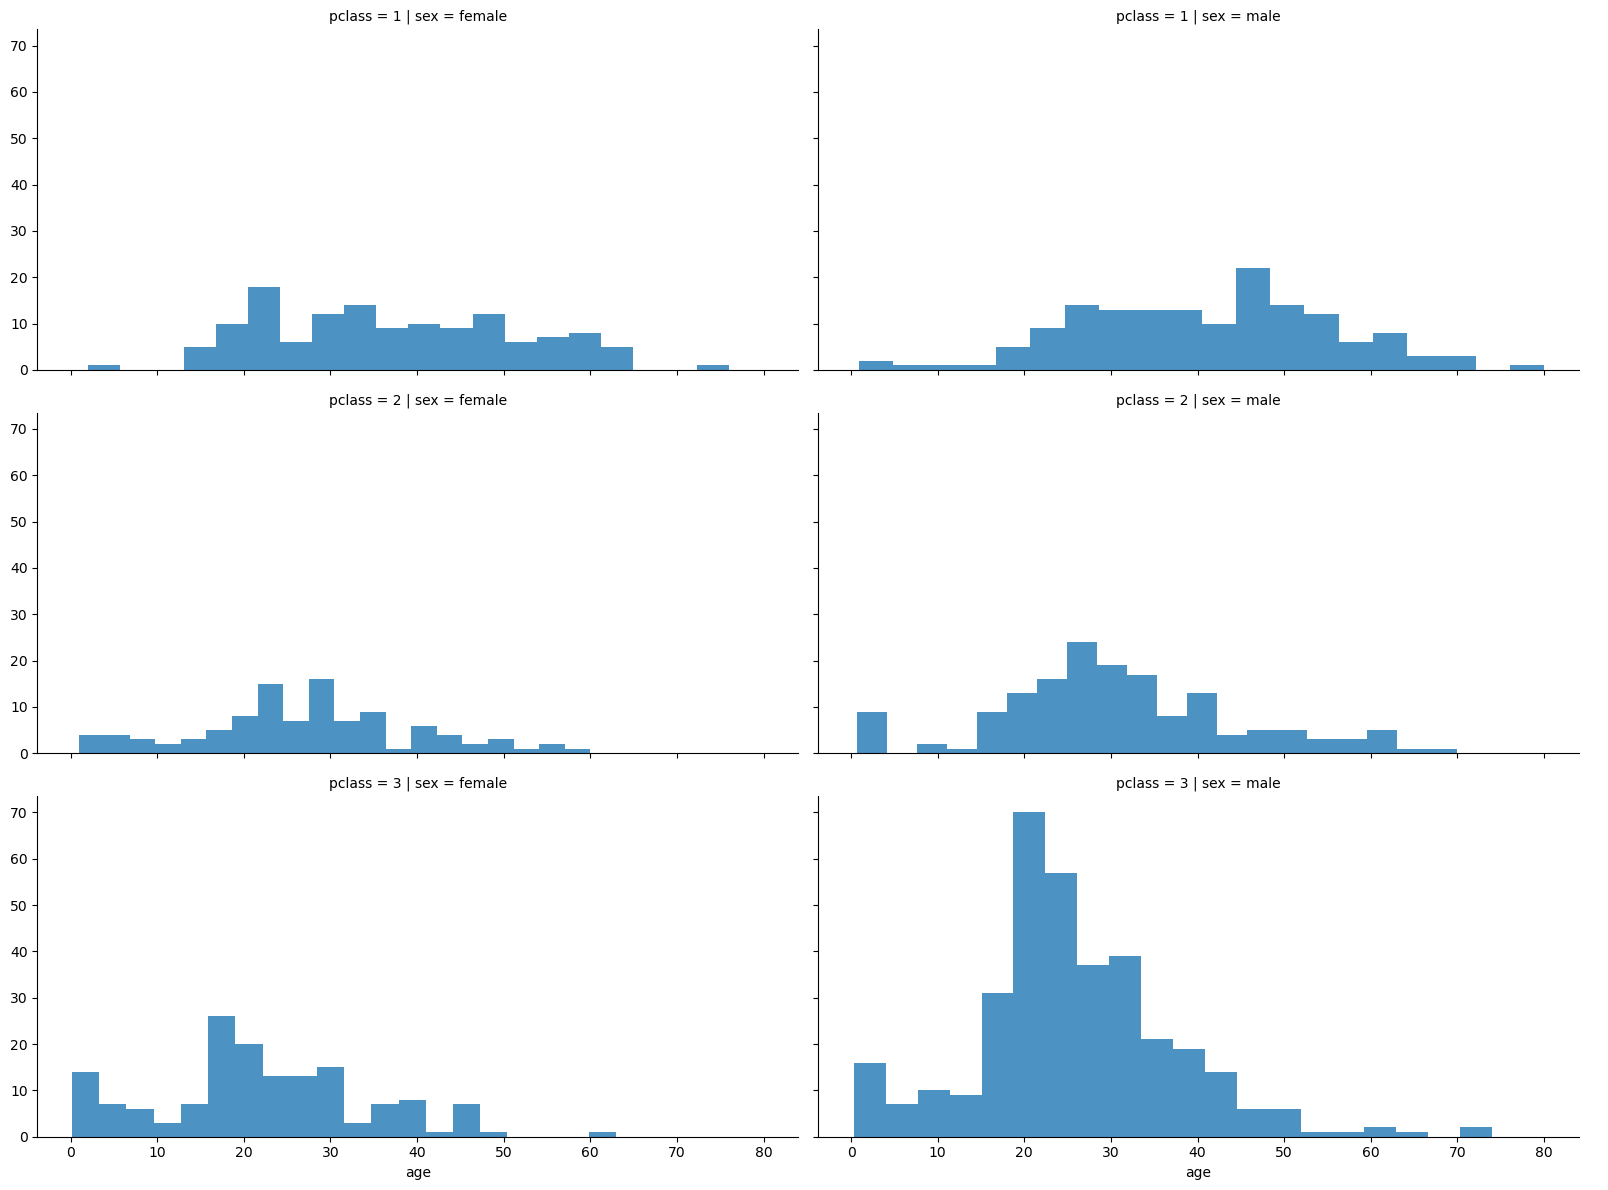

In [7]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8,bins=20)
grid.add_legend();

In [8]:
import plotly_express as px


In [9]:
fig = px.histogram(titanic,x='age')
fig.show()

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



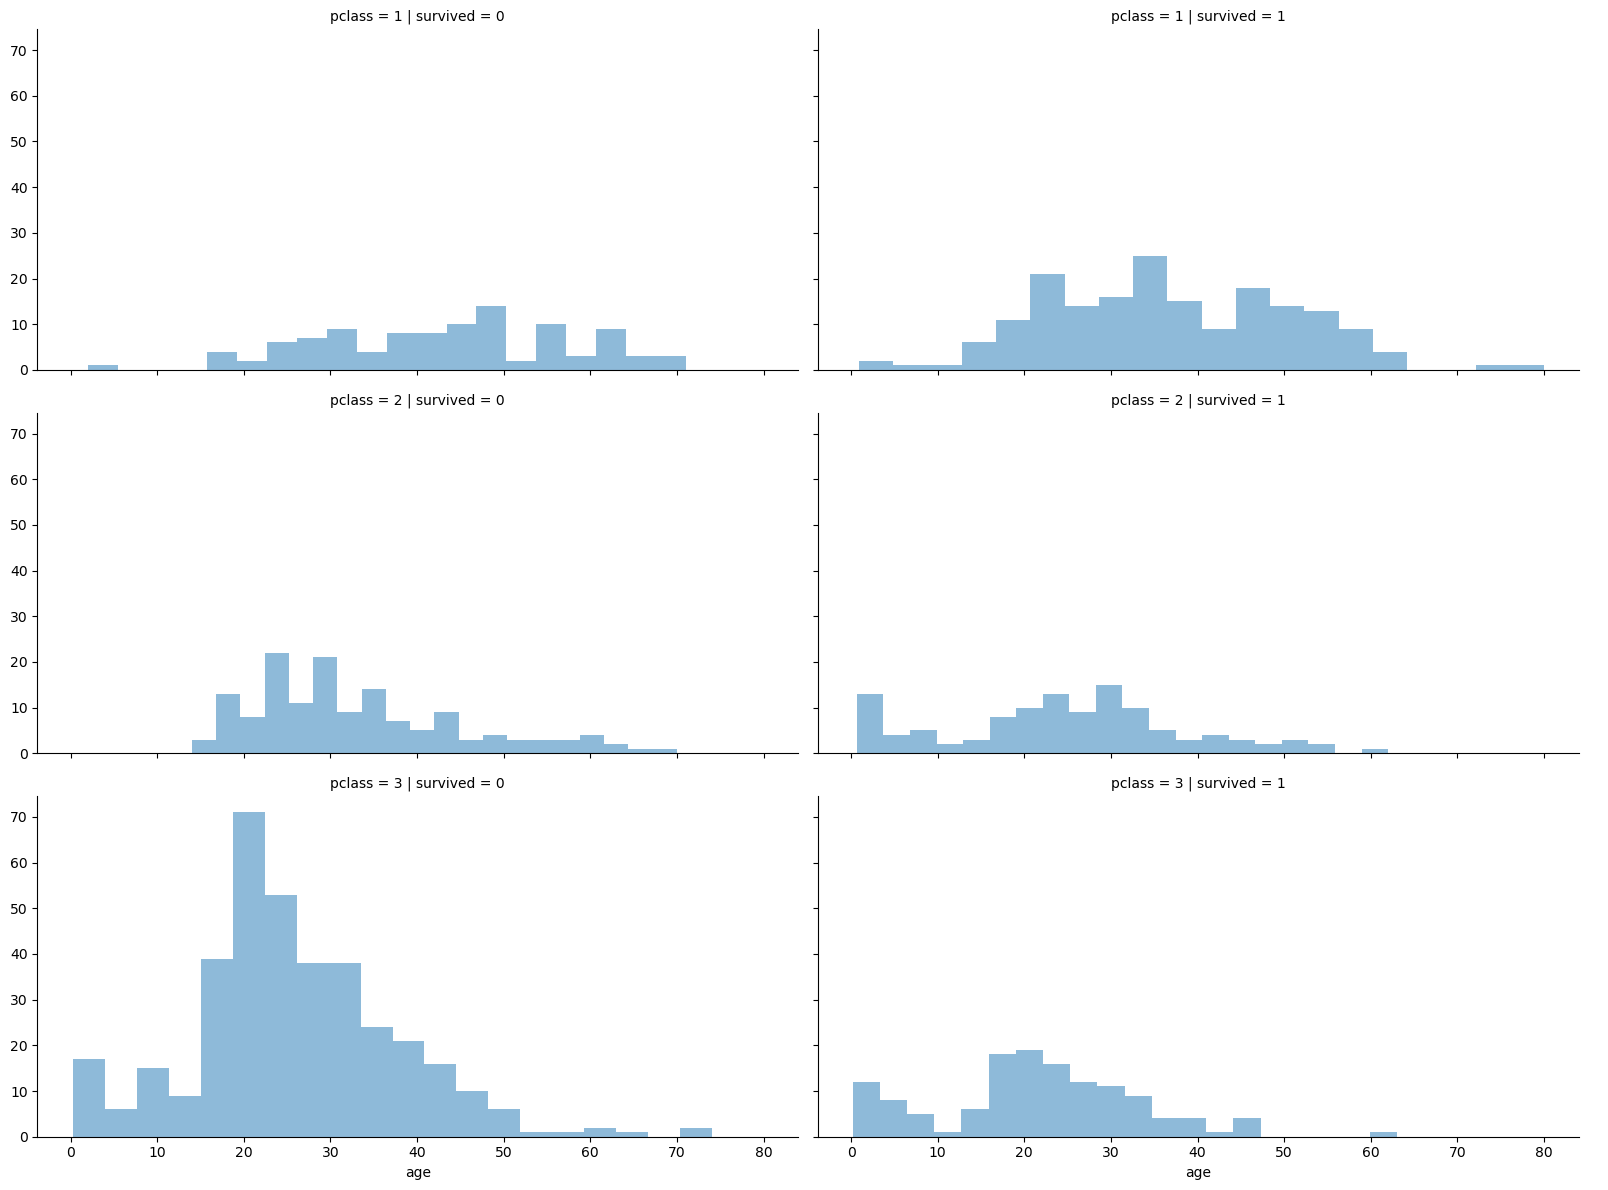

In [10]:
# 등실별 생존률
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5,bins=20)
grid.add_legend();

In [11]:
titanic['age_cat'] = pd.cut(titanic['age'],bins=[0,7,15,30,60,100],
        include_lowest=True,
        labels=['baby','teen','young','adult','old'])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


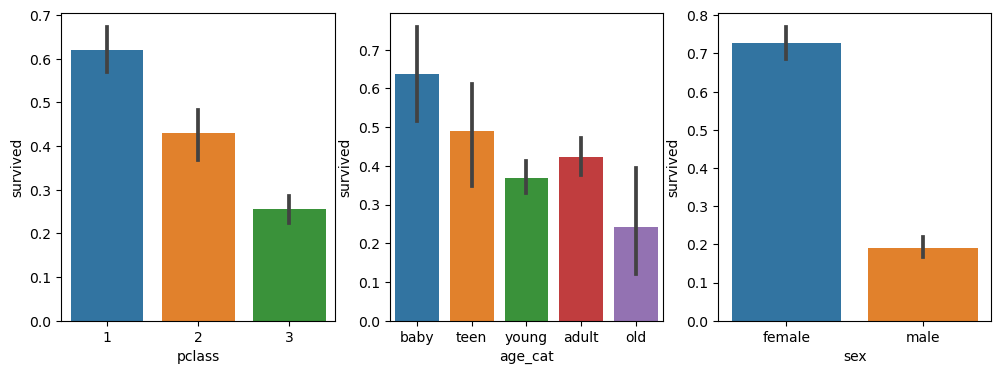

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot(x='pclass', y='survived',data=titanic)

plt.subplot(132)
sns.barplot(x='age_cat', y='survived',data=titanic)

plt.subplot(133)
sns.barplot(x='sex', y='survived',data=titanic)

plt.show()

Text(0.5, 1.0, 'Male')

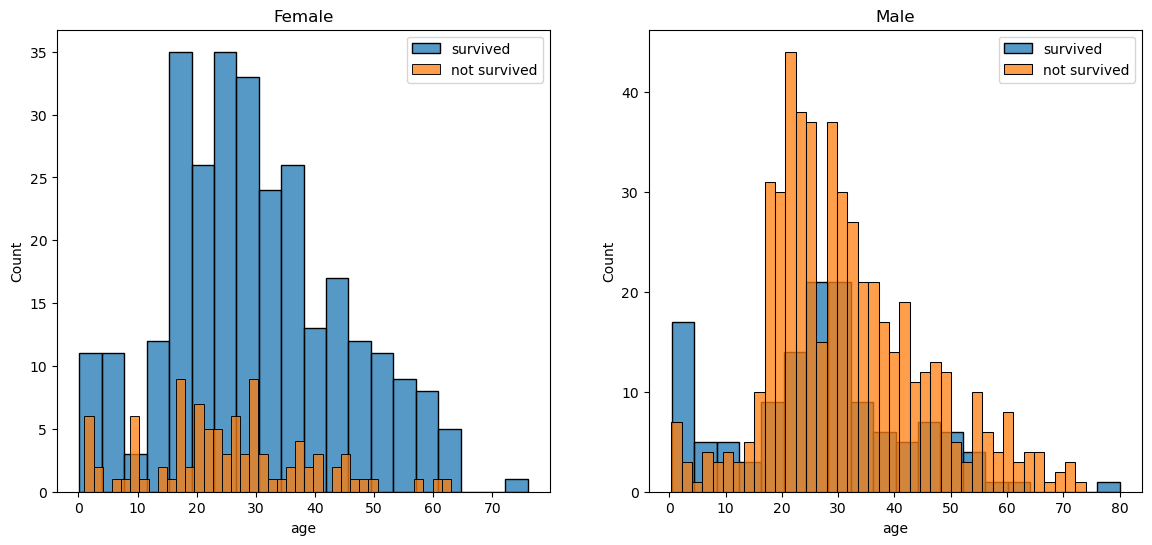

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex']=='male']

ax = sns.histplot(women[women['survived'] == 1]['age'], bins=20, label='survived', ax=axes[0], kde=False)
ax = sns.histplot(women[women['survived'] == 0]['age'], bins=40, label='not survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.histplot(men[men['survived'] == 1]['age'], bins=20, label='survived', ax=axes[1], kde=False)
ax = sns.histplot(men[men['survived'] == 0]['age'], bins=40, label='not survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')

In [25]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [26]:
pd.crosstab(titanic['title'],titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [27]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [ ]:
titanic['ticket']

Rare_f = ['Dona','Lady','the Countess']